# OpenAI Collection 1

index:

1 Answer with set system and model

2 Tool - embeddings - Answer with Generated Vector RAG(LangChain)

3 Conversations

4 Generate Image

5 Generate Sound

6 Generate Code


#### API Menu

#### 1 openai.chat.completions.create
#### item:
    model= 'gpt-4o-mini'

    messages = [
        {'role': 'user', 'content': 'system settiing'},
        {'role': 'user', 'content': x}
    ]

    max_tokens=200

    temperature=.7

    stream=True # for return2
#### return1:
    res.choices[0].message.content
    
#### return2(to generate code):
    res = ''
    for x in llm:
        res += x.choices[0].delta.content or ''
    res.replace('```cpp','').replace('```','')
    
#### item:
    model="meta-llama/Meta-Llama-3-8B-Instruct"
    
    messages=[{'role': 'user', 'content':'system setting'}]
    
#### return:
    res.choices[0].message.content

#### 2 invoke with langchain
#### openai setting:
    llm = ChatOpenAI(temperature=0.7, model_name='gpt-4o-mini')
#### item:
	memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)
    retriever = vectorstore.as_retriever()
    conversation_chain = ConversationalRetrievalChain.from_llm(llm=llm, retriever=retriever, memory=memory)
#### return:
    conversation_chain.invoke({'question':'Hello'})['answer']

# 1 Answer with set system and model

In [10]:
import os
from dotenv import load_dotenv
from openai import OpenAI
load_dotenv()
openai = OpenAI()
def say(x):
    prompts = [
       {'role': 'system', 'content': 'Please answer one short and simple sentence.'},
       {'role': 'user', 'content': x}
    ]
    res= openai.chat.completions.create(
        model='gpt-4o-mini', # it's cheapest. high quality: gpt-4o-turbo
        max_tokens=200,
        messages=prompts, 
        temperature=0.7
    )
    return res.choices[0].message.content
print(say('Hello. How are you doing?'))

Hello! I'm here and ready to help you.


# 2 Embedding
Answer with Generated Vector RAG(LangChain)

In [1]:
import os
import glob
from dotenv import load_dotenv
from langchain_chroma import Chroma
from langchain.document_loaders import DirectoryLoader, TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.schema import Document
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationalRetrievalChain
load_dotenv()
embeddings = OpenAIEmbeddings()
# Delete if already exists
# if os.path.exists('coreweave/vector/openai'):
#     Chroma(persist_directory='coreweave/vector/openai', embedding_function=embeddings).delete_collection()
folders = glob.glob('coreweave/md/*')
text_loader_kwargs = {'encoding': 'utf-8'} # Mac
# text_loader_kwargs={'autodetect_encoding': True} # Windows
documents = []
for x1 in folders:
    doc_type = os.path.basename(x1)
    loader = DirectoryLoader(x1, glob='**/*.md', loader_cls=TextLoader, loader_kwargs=text_loader_kwargs)
    folder_docs = loader.load()
    for x2 in folder_docs:
        x2.metadata['doc_type'] = doc_type
        documents.append(x2)
llm = ChatOpenAI(temperature=0.7, model_name='gpt-4o-mini')
memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)
#1 generate vector at vector_data folder
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = text_splitter.split_documents(documents)
vectorstore = Chroma.from_documents(documents=chunks, embedding=embeddings, persist_directory='coreweave/vector/openai')
retriever = vectorstore.as_retriever()
conversation_chain = ConversationalRetrievalChain.from_llm(llm=llm, retriever=retriever, memory=memory)
result = conversation_chain.invoke({'question':'Can you describe CoreWeave in a few sentences'})
print(result['answer'])

/var/folders/rh/b42qlk7x4mb8h615vc2lc18m0000gn/T/ipykernel_88206/1730960229.py:31: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key='chat_history', return_messages=True)


CoreWeave is a cloud platform specifically designed for scaling, supporting, and accelerating Generative AI (GenAI). It serves as a comprehensive partner that addresses the challenges of deploying AI at scale, making supercomputing accessible and pushing the boundaries of technological possibilities. CoreWeave focuses on managing the complexities of AI growth to provide modern solutions for contemporary technology needs.


# 3 Conversations

In [1]:
import os
from dotenv import load_dotenv
from openai import OpenAI
load_dotenv()
openai = OpenAI()
msgsA = ['Hi there']
msgsB = ['Hi']
def sayA():
    msg = [{'role': 'system', 'content': 'Please answer with short sentence.'}]
    for x, y in zip(msgsA, msgsB):
        msg.append({'role': 'assistant', 'content': x})
        msg.append({'role': 'user', 'content': y})
    res = openai.chat.completions.create(
        model= 'gpt-4o-mini',
        messages=msg
    )
    return res.choices[0].message.content
def sayB():
    msg = [{'role': 'user', 'content': 'Please answer with short sentence.'}]
    for x, y in zip(msgsA, msgsB):
        msg.append({'role': 'user', 'content': x})
        msg.append({'role': 'assistant', 'content': y})
    msg.append({'role': 'user', 'content': msgsA[-1]})
    res = openai.chat.completions.create(
        model= 'gpt-4o-mini',
        messages=msg
    )
    return res.choices[0].message.content

for i in range(5):
    a_next = sayA()
    print(f"A:{a_next}\n")
    msgsA.append(a_next)
    b_next = sayB()
    print(f"B:{b_next}\n")
    msgsB.append(b_next)
    

A:Hello! How can I assist you today?

B:I'm here to help you with any questions you have!

A:Thank you! What would you like to talk about?

B:I'm open to any topic you choose!

A:How about discussing recent advancements in technology?

B:That sounds great! Which specific advancements are you interested in?

A:I'm interested in developments in artificial intelligence and renewable energy.

B:Both fields are rapidly evolving! AI is making strides in natural language processing and automation, while renewable energy technologies, like solar and wind, continue to become more efficient and cost-effective.

A:Absolutely! AI's impact on industries and energy's transition towards sustainability are crucial for the future.

B:Indeed, they are key to driving innovation and addressing global challenges like climate change and economic growth.



# 4 Generate image

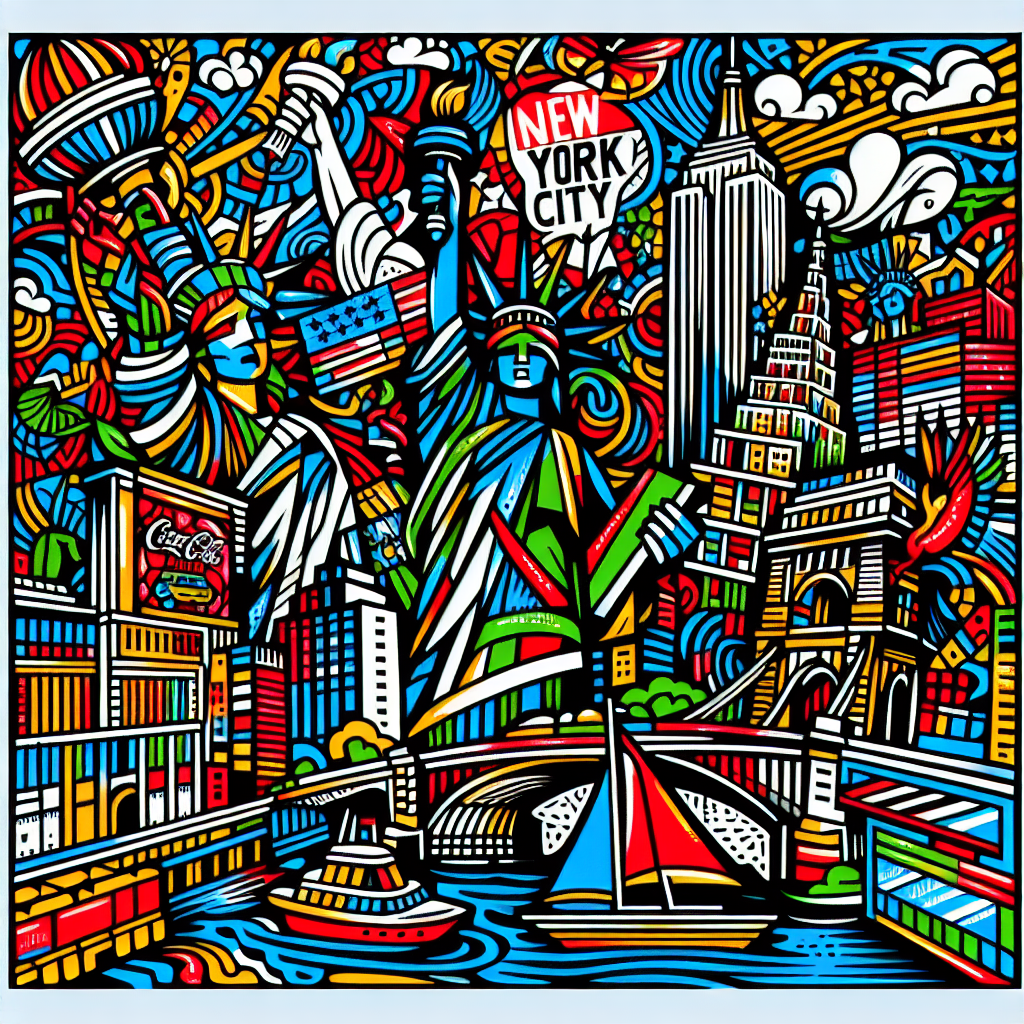

In [1]:
import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import base64
from io import BytesIO
from PIL import Image
load_dotenv()
openai = OpenAI()

def artist(city):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=f"An image representing a vacation in {city}, showing tourist spots and everything unique about {city}, in a vibrant pop-art style",
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))
image = artist("New York City")
display(image)

# 5 Generate Sound

In [4]:
import os
import io
import sys
from dotenv import load_dotenv
from openai import OpenAI
from pydub import AudioSegment
from pydub.playback import play
load_dotenv()
openai = OpenAI()
def talker(message):
    response = openai.audio.speech.create(
      model="tts-1",
      voice="onyx",    # Also, try replacing onyx with alloy
      input=message
    )
    audio_stream = BytesIO(response.content)
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)
talker('Hello. This is chatbot sound by openAI.')

Input #0, wav, from '/var/folders/rh/b42qlk7x4mb8h615vc2lc18m0000gn/T/tmp5gx2ieqd.wav':
  Duration: 00:00:02.40, bitrate: 384 kb/s
  Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 24000 Hz, 1 channels, s16, 384 kb/s
   2.34 M-A:  0.000 fd=   0 aq=    0KB vq=    0KB sq=    0B 

# 6 Generate Code

In [2]:
import os
import io
import sys
from dotenv import load_dotenv
from openai import OpenAI
import time
import subprocess
load_dotenv()
openai = OpenAI()
def sys_settting():
    x = 'You are an assistant that reimplements Python code in high performance C++ for an M3 Mac. '
    x += 'Respond only with C++ code; use comments sparingly and do not provide any explanation other than occasional comments. '
    x += 'The C++ response needs to produce an identical output in the fastest possible time.'
    return x
def usr_settting_and_code(x1):
    x2 = 'Rewrite this Python code in C++ with the fastest possible implementation that produces identical output in the least time. '
    x2 += 'Respond only with C++ code; do not explain your work other than a few comments. '
    x2 += 'Pay attention to number types to ensure no int overflows. Remember to #include all necessary C++ packages such as iomanip.\n\n'
    x2 += x1
    return x2
def sys_usr_setting_and_code(x):
    return [
        {'role': 'system', 'content': sys_settting()},
        {'role': 'user', 'content': usr_settting_and_code(x)}
    ]
def write_output(cpp):
    code = cpp.replace('```cpp','').replace('```','')
    with open('code.cpp', 'w') as f:
        f.write(code)
def py_to_cpp_gpt4o(python):    
    stream = openai.chat.completions.create(
        model='gpt-4o-mini', 
        messages=sys_usr_setting_and_code(python), 
        stream=True
    )
    reply = ''
    for x1 in stream:
        fragment = x1.choices[0].delta.content or ''
        reply += fragment
        print(fragment, end='', flush=True)
    write_output(reply)
def run_cpp():
        try:
            run1 = subprocess.run(['clang++', '-Ofast', '-std=c++17', '-march=armv8.5-a', '-mtune=apple-m1', '-mcpu=apple-m1', '-o', 'code', 'code.cpp'], check=True, text=True, capture_output=True)
            run2 = subprocess.run(['./code'], check=True, text=True, capture_output=True)
            return run2.stdout
        except subprocess.CalledProcessError as e:
            return f'An error occurred:\n{e.stderr}'

In [4]:
# code1 = '''
# print('hi')
# '''
code2 = '''
import time
def echo():
    return 'apple'
start_time = time.time()
result = echo()
end_time = time.time()
print("Result:", result)
print("Execution Time: {:.6f}s".format(end_time-start_time))
'''
# python show and run code
print('------------------')
print(code2)
print('------------------')
exec(code2)
# # cpp show and run code (gpt-4o-mini)
print('------------------')
print(py_to_cpp_gpt4o(pi))
print('------------------')
print(run_cpp())

------------------

import time
def echo():
    return 'apple'
start_time = time.time()
result = echo()
end_time = time.time()
print("Result:", result)
print("Execution Time: {:.6f}s".format(end_time-start_time))

------------------
Result: apple
Execution Time: 0.000001s
------------------
```cpp
#include <iostream>
#include <iomanip>
#include <chrono>

std::string echo() {
    return "apple";
}

int main() {
    auto start_time = std::chrono::high_resolution_clock::now();
    std::string result = echo();
    auto end_time = std::chrono::high_resolution_clock::now();
    
    std::chrono::duration<double> execution_time = end_time - start_time;
    
    std::cout << "Result: " << result << std::endl;
    std::cout << "Execution Time: " << std::fixed << std::setprecision(6) << execution_time.count() << "s" << std::endl;

    return 0;
}
```None
------------------
Result: apple
Execution Time: 0.000000s

